#### 1. Fundamental Idea behind SVMs?
The fundamental idea behind SVMs is to find [a] decision boundary(s) that separate the data.

In terms of classification, the idea is to find the "widest street" that separates the classes; called *large margin classification*

#### 2. What is a support vector?
Support vectors are data instances that determined the edge of the street.

#### 3. Why is it important to scale inputs when using SVMs?
SVMs are sensetive to feature scales and may cause an improper support vector fit; the edges of the street may not touch the support vectors (data points) that create the best or widest street. (it may overfit or underfit)

#### 5. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?
A SVM cannot natively output a probability. Not sure about confidence score.

Import necessary modules

In [51]:
from sklearn import datasets
import matplotlib.pyplot as plt # Probably don't need this but oh well
iris = datasets.load_iris() # Loads iris data
import pandas as pd
import numpy as np
import seaborn as sns

In [78]:
# type(iris) # Look at type; weird type but it's a dictionary
iris.keys()  # Need to look at the keys
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

df = pd.DataFrame(iris.data, columns=iris.feature_names) # Create dataframe of iris data

In [80]:
target = pd.DataFrame(iris.target) # target names are separated from data in the iris dictionary

In [81]:
# Join the dataframes
df = df.join(target, how = 'outer')

In [92]:
df.head()
df = df.rename(columns={'0': 'flower'})
df.head()
# Need to rename the columns because the 'target' df has range index columns and the df has characters
# Renaming only works if it's renaming every column at once.
df.columns = list('abcde')
# type(df.columns)
# df.head()

pandas.core.indexes.base.Index

Filter out one of the flowers to create linearly separable data

In [95]:
df_new = df.loc[ df['e'] != 2 ]

We now have linearly separable data, as per the `sns.scatterplot(x=x1,y=x2, hue = df_new['e']);`

Let's use this data for the models.

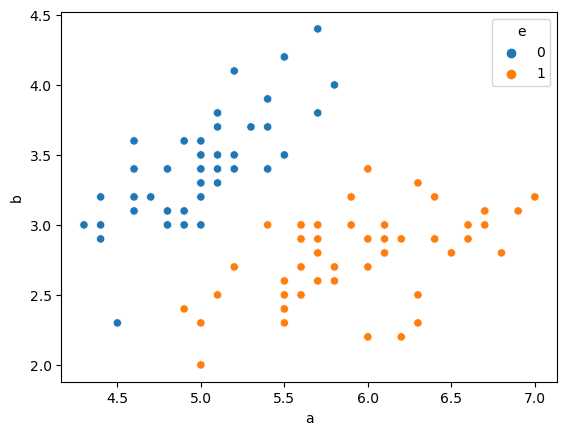

In [96]:
x1 = df_new['a']
x2 = df_new['b']
sns.scatterplot(x=x1,y=x2, hue = df_new['e']);

In [102]:
X = df_new.loc[:,['a','b']]
y = df_new['e']

We now need to train a `LinearSVC()`, an `SGDClassifier`, and an `SVC()` to see that the models are the same.

Recall: we need to scale the data when using SVCs and it's better to scale with SGD as well.

First import the necessary models

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [103]:
# LinearSVC pipeline with scaler
lin_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss = 'hinge')),
])

In [104]:
lin_svc.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [106]:
lin_svc.predict([[5.5, 1.7]])
# WARNING SHOWS UP BECAUSE DATA FITTED WITH MODEL FROM DATAFRAME

C:\Users\linda\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [132]:
lin_svc[1].coef_, lin_svc[1].intercept_

(array([[ 1.97725634, -1.61034447]]), array([0.26582549]))

In [ ]:
######################################################################################

Linear SVC predicts 1, let's see the other models.

In [134]:
svc_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(gamma = 5, C = 1))
])

svc_clf2 = SVC(C = 1)

In [135]:
svc_clf.fit(X,y)

svc_clf2.fit(X,y)

SVC(C=1)

In [117]:
svc_clf.predict([[5.7,2.0]])
# Warning again because fitted from a dataframe instead of a matrix

C:\Users\linda\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [136]:
svc_clf2.predict([[5.7,2.0]])

C:\Users\linda\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [144]:
svc_clf2.coef0

0.0

In [ ]:
#######################################################################

Use a SGD classifier

In [147]:
sgd_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('SGD', SGDClassifier(random_state=42, max_iter=10000) )
])

In [148]:
sgd_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SGD', SGDClassifier(max_iter=10000, random_state=42))])

In [149]:
sgd_clf.predict([[5.7,2.0]])
# Warning again because fitted from a dataframe instead of a matrix

C:\Users\linda\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [150]:
sgd_clf[1].coef_, sgd_clf[1].intercept_

(array([[ 19.35875388, -14.8276244 ]]), array([0.75149931]))